In [16]:
import numpy as np
import pandas as pd
import bqplot
import matplotlib.pyplot as plt

##### Interpretation 1: 
(1) Sales change by Department throughout days

In [9]:
train_sales = pd.DataFrame(pd.read_csv("sales_train_validation.csv"))

train_sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [130]:
sales_by_dpt_by_day = train_sales.groupby(['dept_id']).sum().iloc[:, :].transpose().reset_index()
#sales_by_dpt_by_day['dept_id'] = sales_by_dpt_by_day['dept_id'].str.slice(2, -1, 1)
#real_headers = sales_by_dpt_by_day.iloc(0)
#real_data = sales_by_dpt_by_day[1:]
#print(real_headers)
#print(real_data)

sales_by_dpt_by_day['index']  = sales_by_dpt_by_day['index'].str.slice(2).astype(int)
sales_by_dpt_by_day = sales_by_dpt_by_day.rename(columns={"index": "day"})
sales_by_dpt_by_day

dept_id,day,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2
0,1,2343,4094,16741,3610,154,4105,1584
1,2,2216,4209,16333,3172,185,3858,1776
2,3,1657,3174,12343,2497,185,2827,1100
3,4,1508,3606,13764,2531,138,2732,1133
4,5,1209,2869,10525,1714,100,1802,927
...,...,...,...,...,...,...,...,...
1908,1909,2657,4734,16241,3141,331,6393,1846
1909,1910,2639,4446,16232,3014,339,6580,1783
1910,1911,3169,4974,18561,3678,407,7762,1966
1911,1912,3712,5524,22691,4397,390,9545,2703


Text(0, 0.5, 'Unit Sales')

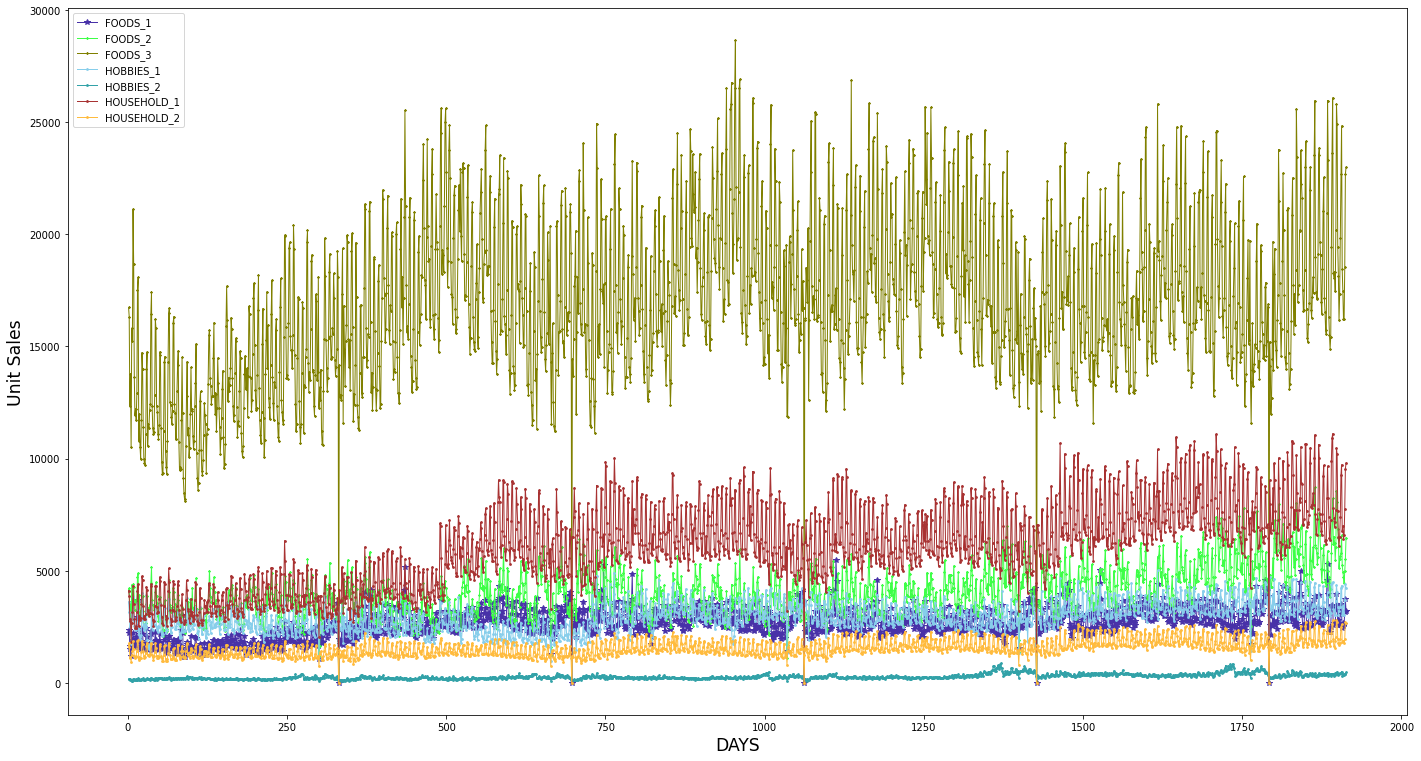

In [133]:
# multiple line plot
# plt.plot( 'index', 'FOODS_1', data=sales_by_dpt_by_day, marker='o', markerfacecolor='green', markersize=7, color='skyblue', linewidth=3)
plt.figure(figsize=(24,13))
plt.plot( 'day', 'FOODS_1', data=sales_by_dpt_by_day, marker='*', color='#4832a8', linewidth=1)
plt.plot( 'day', 'FOODS_2', data=sales_by_dpt_by_day, marker='*', markersize=2, color='#3dff47', linewidth=1)
plt.plot( 'day', 'FOODS_3', data=sales_by_dpt_by_day, marker='*', markersize=2, color='olive', linewidth=1)
plt.plot( 'day', 'HOBBIES_1', data=sales_by_dpt_by_day, marker='p', markersize=2, color='skyblue', linewidth=1)
plt.plot( 'day', 'HOBBIES_2', data=sales_by_dpt_by_day, marker='p', markersize=2, color='#32a2a8', linewidth=1)
plt.plot( 'day', 'HOUSEHOLD_1', data=sales_by_dpt_by_day, marker='p', markersize=2, color='#a83232', linewidth=1)
plt.plot( 'day', 'HOUSEHOLD_2', data=sales_by_dpt_by_day, marker='p', markersize=2, color='#ffbb3d', linewidth=1)

plt.legend()
plt.xlabel('DAYS', fontsize = 'xx-large')
plt.ylabel('Unit Sales', fontsize = 'xx-large')